In [ ]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np
from progressbar import progressbar as pbar

from pyproj import CRS
epsg4326 = CRS.from_epsg(4326)
epsg_california = CRS.from_epsg(26946)


In [33]:
mfile = '/opt/data/california-worldcover-chips-osm-multilabels.parquet'
m = gpd.read_parquet(mfile)
m.head()

,onehot_count,onehot_area,onehot_length,string_labels,col,row,geometry,split
chip_id,,,,,,,,
193c3415fc237,"[24, 24, 1344, 388, 472, 21, 453, 2, 8, 0, 0, ...","[58033.967200952815, 58033.967200952815, 23937...","[4913.205774298301, 4913.205774298301, 74943.4...","[amenity=*, amenity=parking, building=*, build...",78080,96000,"POLYGON ((-118.47200 33.97867, -118.47200 34.0...",train
1639b12583426,"[148, 148, 4171, 1245, 1891, 52, 938, 13, 32, ...","[160073.78667008967, 160073.78667008967, 80191...","[20966.344659970102, 20966.344659970102, 24881...","[amenity=*, amenity=parking, building=*, build...",78080,95744,"POLYGON ((-118.47200 34.00000, -118.47200 34.0...",train
253904d963d6a,"[65, 65, 200, 104, 76, 0, 18, 2, 0, 0, 0, 0, 0...","[101980.95118259436, 101980.95118259436, 71246...","[10597.989172272657, 10597.989172272657, 16664...","[amenity=*, amenity=parking, building=*, build...",77824,95744,"POLYGON ((-118.49333 34.00000, -118.49333 34.0...",train
00530dca88d4a,"[9, 9, 4897, 688, 4026, 0, 172, 10, 1, 0, 0, 0...","[17637.908172952746, 17637.908172952746, 10930...","[1925.4953839123748, 1925.4953839123748, 32065...","[amenity=*, amenity=parking, building=*, build...",77824,95488,"POLYGON ((-118.49333 34.02133, -118.49333 34.0...",train
0e554bbdbe661,"[80, 80, 4358, 1262, 2386, 59, 597, 27, 27, 0,...","[131950.60085068244, 131950.60085068244, 98472...","[13536.03447682216, 13536.03447682216, 283601....","[amenity=*, amenity=parking, building=*, build...",78080,95488,"POLYGON ((-118.47200 34.02133, -118.47200 34.0...",train


## read embeddings

In [12]:
basedir = '/opt/data/clay-worldcover-embeddings/v002/2021'
files = os.listdir(basedir)

In [14]:
zs = [gpd.read_parquet(f"{basedir}/{file}") for file in pbar(files)]

100% (1359 of 1359) |####################| Elapsed Time: 0:00:34 Time:  0:00:340002


In [29]:
z = pd.concat(zs)
z = gpd.GeoDataFrame(z[['geometry']], crs=z.crs)

In [58]:
z = pd.concat(zs)

In [59]:
z.head()

,embeddings,geometry
0,"[0.0040364233, 0.011993585, -0.0061575267, 0.0...","POLYGON ((-80.07200 42.91733, -80.07200 42.960..."
1,"[0.0035310758, 0.010717143, -0.0063207466, 0.0...","POLYGON ((-80.07200 42.87467, -80.07200 42.917..."
2,"[0.0039245784, 0.010202475, -0.006146049, 0.02...","POLYGON ((-80.07200 42.83200, -80.07200 42.874..."
3,"[0.0041164826, 0.01097924, -0.0050882515, 0.02...","POLYGON ((-80.07200 42.78933, -80.07200 42.832..."
4,"[0.008650048, 0.015855795, -0.0077539827, 0.01...","POLYGON ((-80.07200 42.74667, -80.07200 42.789..."


In [ ]:
z[['geometry']].sample(1000).explore()

# restrict to california

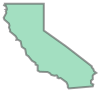

In [93]:
cc = gpd.read_file(f"/opt/data/osm/CA_State_TIGER2016.shp").to_crs(epsg4326)
c = cc.geometry[0]
c = list(c.geoms)[6].simplify(tolerance=.05)
caldf = gpd.GeoDataFrame(geometry=[c], crs=epsg4326)
c

In [94]:
zc = z[[c.intersects(gi) for gi in pbar(z.geometry.values)]]

100% (464692 of 464692) |################| Elapsed Time: 0:00:06 Time:  0:00:060000


In [95]:
zc.shape

(21348, 2)

In [ ]:
zc[['geometry']].explore()

In [90]:
mi = m.sample(1).iloc[0]
zsample = z.sample(10000)
gidxs = [mi.geometry.intersects(gi) for gi in pbar(z.geometry.values)]
zmi = z[gidxs].copy()
zmi.loc[0] = [ np.r_[0,0,0], mi.geometry ]
zmi.crs = epsg4326


100% (464692 of 464692) |################| Elapsed Time: 0:00:10 Time:  0:00:100000


In [91]:
zmi

,embeddings,geometry
157,"[0.009271244, 0.010958168, -0.002312369, 0.025...","POLYGON ((-123.97600 41.59467, -123.97600 41.6..."
158,"[0.008866268, 0.0109481895, -0.0025550167, 0.0...","POLYGON ((-123.97600 41.55200, -123.97600 41.5..."
179,"[0.008450554, 0.0106904125, -0.0035659026, 0.0...","POLYGON ((-123.93333 41.59467, -123.93333 41.6..."
180,"[0.008910642, 0.010930562, -0.0027017933, 0.02...","POLYGON ((-123.93333 41.55200, -123.93333 41.5..."
0,"[0, 0, 0]","POLYGON ((-123.95467 41.59467, -123.95467 41.6..."


In [ ]:
zmi[['geometry']].explore()